# Learn-It Getting Started


In general a learning problem considers a set of n samples of data and then tries to predict properties of unknown data. If each sample is more than a single number then it is said to have several attributes or features. Classification is a subproblem of Machine Learning when samples belong to two or more classes and having a set of labeled data we would like to be able to predict(label) the correct class for an unseen data samples.

Learn-It can automate classification task workflow for you. For example, you have some labeled historical data and you would like to predict a certain outcome for new unlabeled data samples. Or, lets say you have a dataset of users, their past missed doctor appointments and ones they arrived on time for. Your task is to predict for new appointments made, which patients will likely miss those appointments and which will arrive on time. Learn-It can help with all of these tasks by using your labeled data to train a machine learning model.

Here's the workflow: both `AutoConverter` and `AutoLearn` work automatically.

![Learn-It workflow](images/workflow.png)
Tabular data is automatically converted from it's original representation into a **feature matrix**, consisting only of numbers and the **feature vector**, which encodes the values we would like to predict in future. This operation is automated with `AutoConverter`. 

Then the feature matrix and the target vector are fed to 'AutoLearn'. The latter trains several machine learning models on this data and chooses the best performing one. The user gets this model and it's ready to use.

As soon as we get the trained model, we can start using it on the unseen data. Convert it using already fitted `AutoConverter` and feed to the model. Decode the feature vector back and we are all set!
![Prediction phase](images/prediction.png)

These steps are often called Machine Learning pipeline and developing a pipeline for each problem has been a time-consuming task for data scientists and machine learning engineers. Learn-It will automate these steps and save time for them to work on other tasks.

Let's get started!

First we need to import the needed libraries:

In [1]:
import sys

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate

sys.path.append("../")
from learnit import AutoConverter, AutoLearn, Evaluate
warnings.filterwarnings('ignore')

%matplotlib inline
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## 0. Inspect the dataset
Most of the modern databases support saving spreadsheet to .cvs file. CVS here means 'comma separated value' and is the most common data format for tabular data. We will now open this type of file and it is automatically converted to a special pandas `DataFrame` object. This object is easy to work with. 

In [2]:
# Load the Titanic dataset from local
df = pd.read_csv("data/train.csv")

With the following operation we inspect what is inside the dataset, printing the 'head' of it (first values). This gives a good view of what we have and we can double check that the data is correctly imported. Our demo dataset contains the informaiton about the passengers of Titanic. We will try to predict, based on name, age, gender and other characteristics of the passangess, who of them would survive in the catastrophe. This way `Survived` column is going to be our **target** column. 


In [3]:
# Take a look at the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's also inspect the distribution of **target** column values. We need to make sure that there exists enough data for each class. With the following comand we get the bar plot of the classes we have in the dataset.

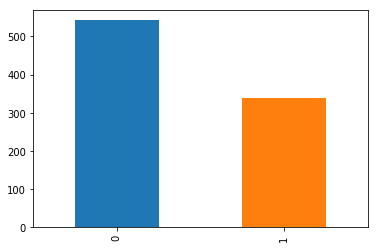

In [4]:
df["Survived"].value_counts().plot(kind="bar")

## 1. Quick Tour
After we inspected the dataset and made sure that it looks valid, we can start working with it closely. First we convert the tabular data to the **feature matrix** and **target value**. To do so we first create `AutoConverter` class and then fit it with our data. Note that we used our `Survived` column as target to tell `AutoConverter` what is going to be target vector.

By printing shapes of the objects you can see that our 12-column dataset with 891 rows is converted to over thousand column matrix with the same number of rows. This happens because some data columns can actually contain more information to extract. For example date can contain such obvious information as day, month and year and some less obvious information like day of the week. 

In [5]:
# Convert an original table into feature matrix with AutoConverter
ac = AutoConverter(target="Survived")
X, y = ac.fit_transform(df)

print(df.shape)
print(X.shape)
print(y.shape)

(881, 12)
(881, 1215)
(881,)


Now we are ready to train the machine learning model. We first create the instance of `AutoLearn` class and then pass our feature matrix `X` and target vector `y` to it. The process of finding the best performing predictive model starts. After it finishes we will get the best performing model that is ready to use. 

*Note: depending on your time and computational capacities you can choose different values of `level`, from 1 to 5. First level is the fastest, 5th level contains the more complicated models. In general the higher the level, the more precision you can get. However it's a good idea to try lower levels first, since it's faster. You can also get into the situation when lower level gives you the same performance level as the upper one, requiring significantly less time to run. This might happen. So it is a good idea to start with lower levels and see which precision you get and how it changes with the level. *

In [6]:
# Automatic model selection with AutoLearn
al = AutoLearn(level=1)
results = al.learn(X, y)

Learning from data...


100% (1 of 1) |███████████████████████████| Elapsed Time: 0:00:02 Time: 0:00:02


### Take a look at AutoLearn results

It's always useful to have a look at `AutoLearn` results. This way you can understand how well the resulting best model works. Here are the performance results for the best model. The performance was evaluated using K-fold method with 5 folds. It means that 5 times the dataset was randomly split to training and test sets. We can train the model using the training set and then test it with the test dataset. It has been made 5 times to ensure that the result is not dependant on the particular split. The results then are averaged to get a valid metric. `train` column is about the precision acheved with the algorithm on a training set (the set that the algorithm has learnt). `test` column is about performance on a test set. It's usual that training set performance is slightly better than the one on a test set. If these figures differ significantly, it means that the model is *overfitted* and fails to generalize. In this case it's a good idea to increase the dataset size. 


In [7]:
info, metrics = al.display(tab=False)
info

,value
metric,
Including classifiers,[LogisticRegression]
Training time,2.57 sec.
Model is trained,True
Classifier set level,1
Evaluation metric,roc_auc
Best classifier,LogisticRegression
Dataset size,881
# of features,1215


In [8]:
metrics.head()

,training set,test set
metric,,
Accuracy,0.945530,0.815015
Precision,0.947355,0.807832
Recall,0.937235,0.797766
roc_auc,0.980184,0.879114


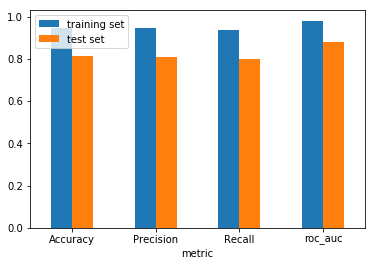

In [9]:
#Visualize train/test performance with error bars (standard deviation)
metrics.plot(kind="bar", rot=0)

The results show that using the level one `AutoLearn` we could achieve 0.81% precision on a test set. It is usual for the predictive models to achieve better results on *training set* than on *test_set*. This happens because the model can see the data in the *training set* and take it into account and can not see the data from the *test set*. This difference, however should not be too big. For example if the model achieves 99% results on training data and 60% on test data that would indicate that the model is overfitting the data and fails to generalize to the unseen data. It would be a good idea to increase the dataset in this case.


## 2. Predicting values for the unseen data

The purpose of training the model is to predict values for the new, unseen data. Let's try to do that. 

In [10]:
df_unseen = pd.read_csv("data/titanic_test.csv")
X_predict = ac.transform(df_unseen, prediction=True)

# Predict and decode the labels
prediction = ac.index2label(al.predict(X_predict))
df_unseen['prediction'] = prediction
df_unseen[['prediction', 'Survived']]

,prediction,Survived
0,1,1
1,1,1
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


## 3. Understanding Predictive Models via Feature Importance Calculation

Let's have a closer look at the model that `AutoLearn` trained for us. Here's how we can get the full list of metrics for the given model. 



Users usually want to understand what stands behind the model's decisions. One way to do so is to calculate the feature importance. This metric shows which data column is giving the highest contribution to the decision has made. This is a good way to perform a sanity check of the model. 

To activate the function we use pre-fit `AutoConverter` and pre-trained `AutoLearn` instance.

In [11]:
# Feature Importance calculation with Evaluate
e = Evaluate(ac=ac, alearn=al)
col_imp_df = e.calculate_column_importance()
pd.DataFrame(col_imp_df["roc_auc"])

roc_auc
tablename colname           
main      Age       0.000316
          Cabin     0.008051
          Embarked  0.000295
          Fare      0.000485
          Name      0.050312
          Parch     0.001205
          Pclass    0.005542
          Sex       0.135522
          SibSp     0.004353
          Ticket    0.065219

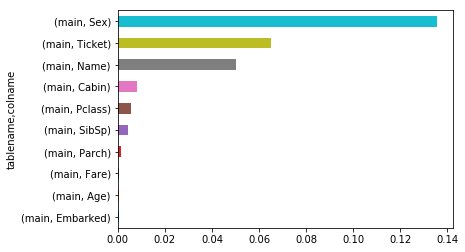

In [12]:
# Will be implemented as a function. Don't worry!
col_imp_df["roc_auc"].sort_values().plot(kind="barh")

# 4. Error Analysis

It would be very useful to see what examples are being mispredicted by the model. When we observe these examples we can get the idea of how the model is performing and if there are some common misprediction patterns in the data. If we see that some group of examples usually causes problems we could improve feature engineering step to better capture that pattern.

In [13]:
mispred_df = e.get_mispredictions(df)
print(mispred_df)

[WARNING] This instance already has been fitted.
     PassengerId  Survived  Pclass                                    Name  \
107          108         1       3                  Moss, Mr. Albert Johan   
169          170         0       3                           Ling, Mr. Lee   
199          200         0       2  Yrois, Miss. Henriette ("Mrs Harbeck")   
207          208         1       3             Albimona, Mr. Nassef Cassem   
271          272         1       3            Tornquist, Mr. William Henry   
288          289         1       2                    Hosono, Mr. Masabumi   
305          306         1       1          Allison, Master. Hudson Trevor   
312          313         0       2   Lahtinen, Mrs. William (Anna Sylfven)   
357          358         0       2               Funk, Miss. Annie Clemmer   
607          608         1       1             Daniel, Mr. Robert Williams   
673          674         1       2                   Wilhelms, Mr. Charles   
744          74

It is also very useful to get reason codes for the concrete predictions made. This would show us which feature values vere deciding in making this prediction. 

In [14]:
# Reason codes
pd.concat([e.get_explanations(df), pd.DataFrame(al.predict(X), columns=["prediction"])], axis=1).head()

,explanations,prediction
0,"[(Sex, male), (Name, Braund, Mr. Owen Harris),...",0
1,"[(Sex, female), (Cabin, C85), (Name, Cumings, ...",1
2,"[(Sex, female), (Ticket, STON/O2. 3101282), (N...",1
3,"[(Sex, female), (Pclass, 1), (Cabin, C123)]",1
4,"[(Sex, male), (Ticket, 373450), (Pclass, 3)]",0


# 5. Auto-aggregation function

In [15]:
import os

dirpath = "data/kaggle-kkbox-churn-prediction-challenge-1k"

members_df = pd.read_csv(os.path.join(dirpath, "members_train.csv"))
transactions_df = pd.read_csv(os.path.join(dirpath, "transactions.csv"))
user_logs_df = pd.read_csv(os.path.join(dirpath, "user_logs.csv"))

In [16]:
# main table that contains label information
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,is_churn
0,Y9KbYbLpZ1VPuYUomzhbj7bYe8kHg9l28PI6+Nu6G90=,13,23,male,9,20150409,20170916,0
1,lMOgMeD05qWJ2A1j+YKwQIR5boRXFSyZo7OWLaZ449E=,1,0,NaN,4,20160213,20171005,0
2,N1KD7Qk9tI4sqBtWUacP9Z9RWW4Q5DJO5GE39Bg9UXE=,1,0,NaN,7,20160729,20170930,0
3,r/d1ZxJs1zJN/GuAV3cf+WucqnGO21gLZZKc8vWF/+E=,1,0,NaN,7,20140510,20170912,0
4,e4qA9TOjpKgDF9Qqgn/FhVaf+pXO1GIIXWA9SgEDi5Q=,1,0,NaN,7,20140108,20160325,1


In [17]:
# subtable1
transactions_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,vhObkJPRzgPP74QozoUOtfqPXmtnn4aIy83racbStn8=,41,30,149,149,1,20150813,20150913,0
1,v55Yov8H345QkST/83nb0W/J8iSN0ZnuhkVJ0IdjQiw=,40,30,149,149,1,20150622,20150722,0
2,ZRFLkvyK429YCuDE5/Y7DKW7CqizEUBMRRQ20jkCmG0=,41,30,149,149,1,20151103,20151203,0
3,x2fkHWRU3nz5ciXosz6pSQeUUflee8B7SarkRPzUM7M=,41,30,99,99,1,20160710,20160810,0
4,eHo3iDzl365KV/PPnLQ56ItjCpwu36c2Y5BumJwpoQw=,36,30,150,150,0,20160206,20160307,0


In [18]:
# subtable2
user_logs_df.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,RerdcHbxFp4FZCUl7sZKj9AKfNe264NA3DPBzpjo9XA=,20170226,9,0,0,0,5,14,1460.376
1,AtR26mAugw3aXzu9wPToVQnE1+o8UQZdH6fmCM9gMb0=,20160620,0,0,0,1,0,1,181.429
2,AtR26mAugw3aXzu9wPToVQnE1+o8UQZdH6fmCM9gMb0=,20160924,3,1,1,1,14,20,4311.685
3,AtR26mAugw3aXzu9wPToVQnE1+o8UQZdH6fmCM9gMb0=,20170119,1,1,1,0,17,18,4222.638
4,JQcX1OIXQGa5BlyumndL/QF+jTY6ACIP9FmtbMe0cAY=,20150108,0,0,1,0,3,4,864.830


In [19]:
# define main-subtable relationship
subtables = {"transactions": {"table": transactions_df,                             
                                                   "link_key": "msno",        # link key will be used for join
                                                   "group_key": "msno"},  # group key will be used for aggregation
                      "user_logs": {"table": user_logs_df,
                                              "link_key": "msno",
                                              "group_key": "msno"}}

In [20]:
# AutoConverter works in the same manner
ac2 = AutoConverter(target="is_churn")
X2, y2 = ac2.fit_transform(df=members_df,
                                                subtables=subtables)

In [21]:
X2.shape

(898, 300)

In [22]:
ac2.feature_names[:20]

['main..city.DummyTransformer__Value',
 'main..bd.DummyTransformer__Value',
 'main..gender.CategoryOneHotEncoder__NaN',
 'main..gender.CategoryOneHotEncoder__female',
 'main..gender.CategoryOneHotEncoder__male',
 'main..registered_via.CategoryOneHotEncoder__13',
 'main..registered_via.CategoryOneHotEncoder__3',
 'main..registered_via.CategoryOneHotEncoder__4',
 'main..registered_via.CategoryOneHotEncoder__7',
 'main..registered_via.CategoryOneHotEncoder__9',
 'main..registration_init_time.DummyTransformer__Value',
 'main..expiration_date.DummyTransformer__Value',
 'transactions..payment_method_id.categorical__13',
 'transactions..payment_method_id.categorical__14',
 'transactions..payment_method_id.categorical__15',
 'transactions..payment_method_id.categorical__16',
 'transactions..payment_method_id.categorical__17',
 'transactions..payment_method_id.categorical__19',
 'transactions..payment_method_id.categorical__20',
 'transactions..payment_method_id.categorical__21']

In [23]:
al2 = AutoLearn(level=2)
al2.learn(X2, y2)

Learning from data...


100% (1 of 1) |███████████████████████████| Elapsed Time: 0:00:24 Time: 0:00:24


{'clf': GridSearchCV(cv=5, error_score='raise',
        estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
        max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
        n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=True, subsample=1),
        fit_params=None, iid=True, n_jobs=1,
        param_grid={'learning_rate': [0.01, 0.05], 'n_estimators': [10, 50], 'colsample_bytree': [0.8], 'subsample': [0.75], 'max_depth': [2, 5]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='roc_auc', verbose=0),
 'dataset_size': 898,
 'eval_df':    metric_test  metric_train
 0     0.956150      0.980871
 1     0.791471      0.997694
 2     0.953846      0.996547
 3     0.999408      0.995036
 4     0.971302      0.964566,
 'feature_size': 300,
 

In [24]:
e2 = Evaluate(ac=ac2, alearn=al2)
col_imp_df = e2.calculate_column_importance()
orig_eval_s = e2.evaluate_performance()

In [25]:
orig_eval_s

accuracy             0.985523
average_precision    0.944097
f1                   0.923158
f1_macro             0.923158
f1_micro             0.985523
neg_log_loss        -0.089297
precision            0.992442
precision_macro      0.992442
precision_micro      0.985523
recall               0.872549
recall_macro         0.872549
recall_micro         0.985523
roc_auc              0.993425
dtype: float64

In [26]:
col_imp_df["roc_auc"]

tablename     colname               
main          bd                        0.000070
              city                      0.000186
              expiration_date           0.200906
              gender                   -0.000023
              registered_via            0.000839
              registration_init_time    0.000256
transactions  actual_amount_paid        0.000000
              is_auto_renew             0.000000
              is_cancel                 0.000000
              membership_expire_date    0.002190
              payment_method_id         0.000000
              payment_plan_days         0.000000
              plan_list_price           0.000000
              transaction_date          0.015590
user_logs     date                      0.000117
              num_100                   0.000699
              num_25                    0.000280
              num_50                    0.001002
              num_75                    0.000000
              num_985           